# Центральная предельная теорема и экспоненциальное распределение

Целью настоящей работы является экспериментальное подтверждение Центральной предельной теоремы о том, что сумма $N$ независимых и одинаково распределенных случайных величин имеет распределение, близкое к нормальному. То есть, если есть случайная величина $Х$ из практически любого распределения, а в нашем случае из экспоненциального распределения, и случайным образом из этого распределения сформирована выборка объемом $N$, то выборочное среднее, определенное на основании выборки можно приблизить нормальным распределением со средним значением, которое совпадает с математическим ожиданием исходной совокупности.


Итак, мы знаем, что $плотность$ $вероятности$ $экспоненциального$ $распределения$ случайной величины $X$ имеет вид:

$$ f(x)=\lambda \varepsilon^{-\lambda x} $$

где $x$ > 0,

$\lambda$ > 0 ($\lambda$ - параметр экспоненциального распределения)

$Математическое$ $ожидание$ случайной величины $X$, в соответствии с законом экспоненциального распределения, обратно $\lambda$: $\mu = \frac{1}{\lambda}$

$Дисперсия$ случайной величины $X$ определяется как: $\sigma^2 = \frac{1}{\lambda^2}$

В нашем исследовании используется параметр экспоненциального распределения $\lambda = 0,0125$, тогда $\mu = 80$, $\sigma^2 = 6400$

Для упрощения восприятия значений и эксперимента, предположим, что речь идет о работе устройства со средним ожиданием времени безотказной работы в 80 часов. Тогда, чем больше времени проработает устройство, тем меньше вероятности того, что не будет отказа и наоборот при стремлении работы устройства к нулю часам (минутам, секундам), вероятность его поломки также стремится к нулю.

# 01 Импортирование библиотек
Первым делом импортируем необходимые нам библиотеки.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math
import pylab
import random

# 02 Функции для проведения исследования
Вынесем все разработанные в ходе исследования функции в один блок

In [59]:
# Напишем функцию для определения ТЕОРИТИЧЕСКОЙ плотности экспоненциального распределения случайной величины, 
# с входными параметрами:
    # l (lambda) - параметр распределения сл.вел. (0,0125)
    # x - значение из диапазона "иксовых значений" (используем длину масива выборочных значений, то есть 1000 значений)
def eps_pdf(l, x):
    return (l * math.exp(-l * x))


# напишем функцию формирования выборки из 1000 случайных значений с входными параметрами:
    # value - количество случайных значений (у нас оно будет = 1000)
    # l (lambda) - параметр распределения сл.вел. (0,0125)
    # n - объем выборки (то есть количество раз выбора случайного числа)
def sample_expon(value, l, n):
    mu = 1/l
    list_x = []
    for i in range(value):
        summa = 0
        for j in range(n):
            summa += mu**2*random.expovariate(mu)
        list_x.append(summa/n)
    return list_x

# напишем функцию для формирования начальной таблицы 
def frame_start(l):
    frame = pd.DataFrame({
        'Распределение':'Исходное',
        'Мат. ожидание':1/l, 
        'Дисперсия':(math.sqrt(1/l**2))**2, 
        'Стандарт. откл-е':math.sqrt(1/l**2),
        'Мат. ожидание (откл-е)':'NaN',
        'Мат. ожидание (откл-е, %)':'NaN',
        'Дисперсия (откл-е)':'NaN',
        'Дисперсия (откл-е, %)':'NaN',
        'Стандарт. откл-е (откл-е)':'NaN',
        'Стандарт. откл-е (откл-е, %)':'NaN'
    }, index = [0])
    return frame

# напишем функцию для дополнения таблицы новой строкой I
def frame_conte(n, list_x):
    new_line = {
                'Распределение':'Выборочное',
                'Объем выборки':n, 
                'Мат. ожидание':round(np.mean(list_x),3),
                'Дисперсия':round(np.var(list_x),3),
                'Стандарт. откл-е':round(np.std(list_x),3)}
    return new_line

# напишем функцию для заполнения расчетных показателей первого порядка таблицы строки I
def frame_conte_dif_1(frame, n):
    i = frame.index[-1]
    frame['Мат. ожидание (откл-е)'].iloc[i] = (frame['Мат. ожидание'].iloc[i] - frame['Мат. ожидание'].iloc[0])
    frame['Дисперсия (откл-е)'].iloc[i] = frame['Дисперсия'].iloc[i] - frame['Дисперсия'].iloc[0]/n
    frame['Стандарт. откл-е (откл-е)'].iloc[i] = (
        frame['Стандарт. откл-е'].iloc[i] - frame['Мат. ожидание'].iloc[0]/((frame['Объем выборки'].iloc[i])**0.5))

# напишем функцию для заполнения расчетных показателей второго порядка таблицы строки I
def frame_conte_dif_2(frame): 
    i = frame.index[-1]
    frame['Мат. ожидание (откл-е, %)'].iloc[i] = round(100*(
        frame['Мат. ожидание (откл-е)'].iloc[i] / frame['Мат. ожидание'].iloc[0]),3)
    frame['Дисперсия (откл-е, %)'].iloc[i] = round(100*(
        frame['Дисперсия (откл-е)'].iloc[i] / (frame['Дисперсия'].iloc[0]/frame['Объем выборки'].iloc[i])),3)
    frame['Стандарт. откл-е (откл-е, %)'].iloc[i] = round(float(100*(
        frame['Стандарт. откл-е (откл-е)'].iloc[i] / (
            frame['Мат. ожидание'].iloc[0]/((frame['Объем выборки'].iloc[i])**0.5)))),3)
    

# напишем функцию для определения теоритической плотности соответствующего (выборке) нормального распределения
def normal_pdf(x, mu, sigma):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2)/(sqrt_two_pi * sigma)) 

# формируем гистограмму выборки и график плотности соответствующего нормального распределения
# развивая логику примера с прибором, который обычно работает без отказа 80 часов, по оси икс укажем удиницы измерения - часы
def graph_sample_theory(list_x):
#   гистограмма выборки
    fig, axes = plt.subplots(figsize=(8,4), dpi=80)
    plt.hist(list_x,bins = 'auto', color='purple',normed = True)
    plt.xlabel('Hours')
    plt.ylabel('Value')

#   график плотности
    axes.set_xlim([0,150])
    axes.set_ylim([0,0.12])
    plt.plot(sorted(list_x),[normal_pdf(x, np.mean(list_x), np.std(list_x)) for x in sorted(list_x)], color='green', lw=4)
    plt.xlabel('Hours')
    plt.ylabel('Probability')
    plt.show()

# 03 Теоритическая плотность экпоненциального распределения
Используем нашу самописную формулу и построим графическое отображение плотности распределения

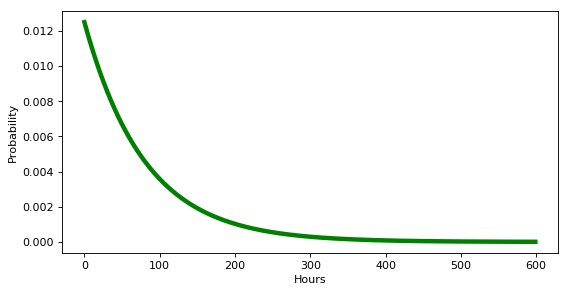

Параметры исходного экспоненционального распределения

   Мат. ожидание  Дисперсия  Стандарт. откл-е
0           80.0     6400.0              80.0


In [60]:
# зададим параметр распределения
l = 0.0125

# сформируем диапазон "иксовых" и "игрековых" значений
list_xt = range(600)
list_yt = [eps_pdf(l, x = i) for i in list_xt]

# сформируем график
# развивая логику примера с прибором, который работает без отказа 80 часов, по оси икс укажем удиницы измерения - часы
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.plot(list_xt, list_yt, color='g', lw=4)
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.show()

# создаем нулевую таблицу (или обновляем таблицу)
frame = pd.DataFrame({'Create new frame':'yes'}, index = [0])

# представим параметры распределения в виде таблицы
print '\033[1m' + '\033[4m' + "Параметры исходного экспоненционального распределения" + '\033[0m'
print
frame = frame_start(l)
print frame[['Мат. ожидание', 'Дисперсия', 'Стандарт. откл-е']]

# 04 Формирование 1000 выборочных независимых случайных величин
В этом блоке мы сформируем выборку из 1000 значений, случайным образом отобранных из экспоненциального распределения

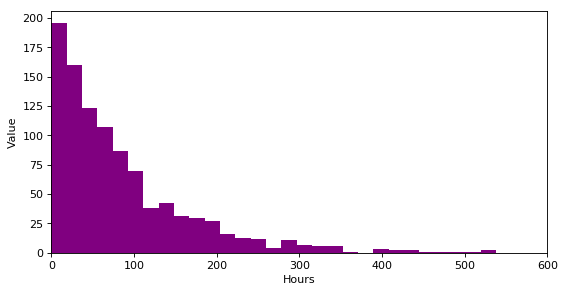

Параметры первой выборки

   Мат. ожидание  Дисперсия  Стандарт. откл-е
1         84.807    7269.16            85.259


In [61]:
# зададим параметры выборки
value = 1000
n = 1

# сформируем выборку
list_x = sample_expon(value, l, n)
  
# формируем гистограмму выборки
# развивая логику примера с прибором, который обычно работает без отказа 80 часов, по оси икс укажем удиницы измерения - часы
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
axes.set_xlim([0,600])
plt.hist(list_x,bins = 'auto', color='purple')
plt.xlabel('Hours')
plt.ylabel('Value')
plt.show()

# занесём ПЕРВИЧНЫЕ результаты (параметры) выборки в таблицу
# определяемые параметры: ср.мат.ожидание, дисперсия, станд.отклонение

for i in range(n):
    frame = frame.append(frame_conte(n, list_x), ignore_index=True)
    frame_conte_dif_1(frame, n)
    frame_conte_dif_2(frame)
print '\033[1m' + '\033[4m' + 'Параметры первой выборки'  + '\033[0m'
print
print frame.loc[[1],['Мат. ожидание', 'Дисперсия', 'Стандарт. откл-е']]

# 05 Сопоставление выборки и исходной совокупности
Выборка случайной величины 1000 раз в соответствии  с законом экспоненциального распределения достаточно хорошо характеризует теоретическую (исходную) совокупность. Что явно прослеживается на графиках

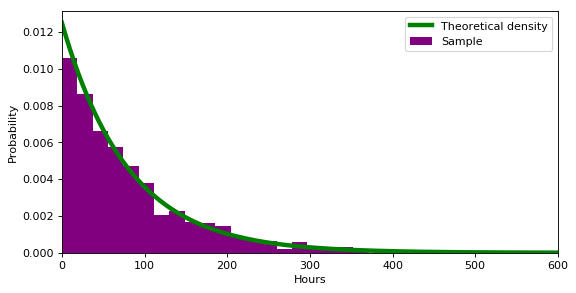

  Распределение  Мат. ожидание  Дисперсия  Стандарт. откл-е
0      Исходное         80.000    6400.00            80.000
1    Выборочное         84.807    7269.16            85.259


In [62]:
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(list_x, bins = 'auto', color='purple', normed = True, label='Sample')
plt.xlabel('Mean')
plt.ylabel('Value')

axes.set_xlim([0,600])
plt.plot(list_xt, list_yt, label='Theoretical density', color='g', linestyle='-', lw=4)
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.legend()
plt.show()

print frame.loc[[0,1],['Распределение','Мат. ожидание', 'Дисперсия', 'Стандарт. откл-е']]

# 06 Количество исследований
Предусмотрим в работе возможность проводить испытания с заданным объемом выборки по несколько раз. По умолчанию испытания проводятся по 1 разу, но особо любознательные могут провести 2,3,4,5 или более раз

In [63]:
# укажем количество исследований
w = 1

# 07 Объем выборок
Определим объем выборок, то есть сколько раз каждое значение из тысячи выборочных будет определено для целей определения среднего арифметического и в последующем занесено в выборку 

In [64]:
choice = (5,50,100,150,300,500)

# 08 Выборки из экспоненциального распределения

В этом блоке сформируем выборки из 1000 случайных значений, где каждое значение будет определено указанное выше количество раз (по умолчанию: 15, 50, 100, 150, 300, 500). 

Результаты представим в виде графиков-гистограмм и таблиц. Поверх каждого графика-гистограммы нарисуем график плотности соответствующего нормального распределения. 

Объем выборки:  5 


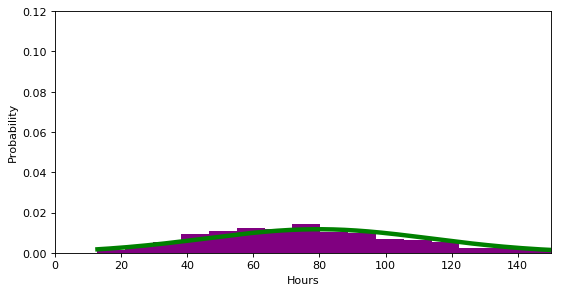

Объем выборки:  50 


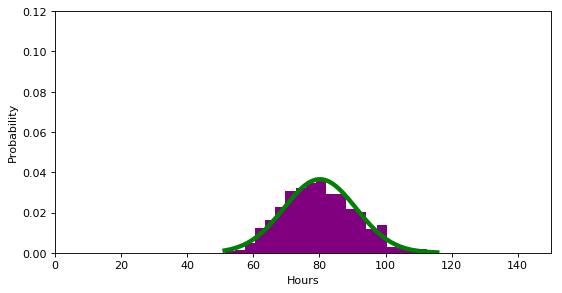

Объем выборки:  100 


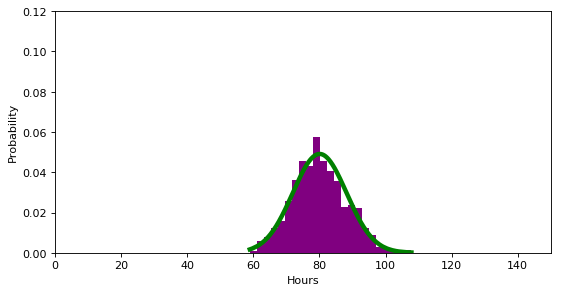

Объем выборки:  150 


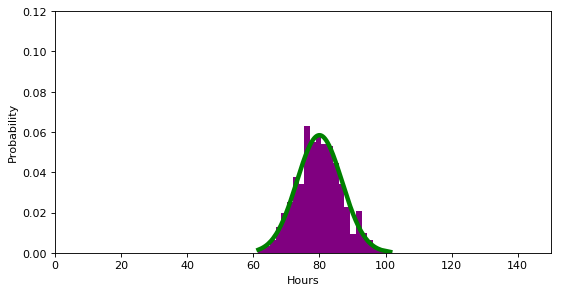

Объем выборки:  300 


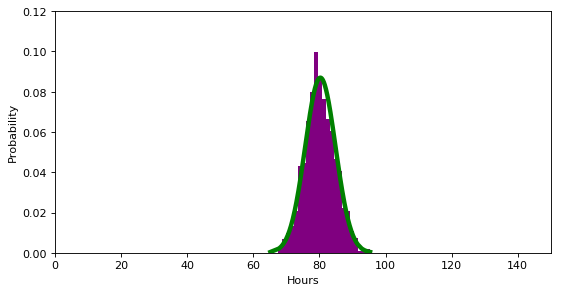

Объем выборки:  500 


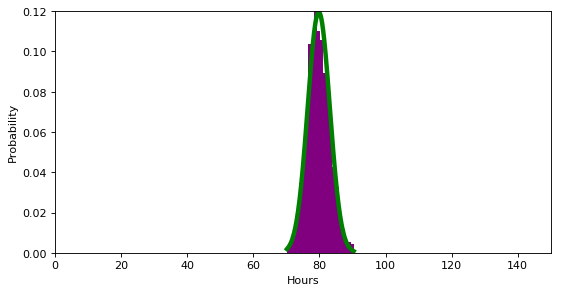

Параметры выборок объемом:  (5, 50, 100, 150, 300, 500) 

  Распределение  Объем выборки  Мат. ожидание  Дисперсия  Стандарт. откл-е
2    Выборочное            5.0         79.621   1163.363            34.108
3    Выборочное           50.0         80.151    119.353            10.925
4    Выборочное          100.0         80.078     66.043             8.127
5    Выборочное          150.0         80.014     46.647             6.830
6    Выборочное          300.0         80.291     21.039             4.587
7    Выборочное          500.0         79.811     11.134             3.337


In [65]:
for n in (choice):
    for i in range(w):
        list_x = sample_expon(value, l, n)
        print '\033[4m' + 'Объем выборки:', '\033[1m', n, '\033[0m' 
        graph_sample_theory(list_x)
        frame = frame.append(frame_conte(n, list_x), ignore_index=True)
        frame_conte_dif_1(frame, n)
        frame_conte_dif_2(frame)

    
print '\033[1m' + '\033[4m' + 'Параметры выборок объемом: ', choice, '\033[0m'
print
i = range(frame.index[-1]+1)
i = i[2:]
print frame.loc[i,['Распределение','Объем выборки','Мат. ожидание', 'Дисперсия', 'Стандарт. откл-е']]

# 9 Подготовка к выводам

По предварительным результатам проведенного исследования, на основании таблицы $Parameters$ $of$ $sample$ $independent$ $random$ $variables$ невооруженным глазом видно, что с каждым увеличением объема выборки, выборочное среднее $\mu $ приближается к теоретическому (исходному) математическому ожиданию $\mu=80$. Глядя на графики видно, что при увеличении объемов выборок, распределение все больше становится похожим на нормальное.

Однако, не будем ограничиваться таковым профессиональным подходом начинающих дилетантов, а проведем дополнительное исследование, а именно для каждого объема $n$ выборки:

1) определим отклонения выборочных средних от значений соответствующих теоретических математических ожиданий 

2) вычислим приближенные параметры нормальных распределений, которыми согласно центральной предельной теоремы приближается распределение выборочных средних и определим их отклонения от параметров исходного распределения

Сформируем таблицу искомых значений $Analysis$ $of$ $parameters$:

In [66]:
print '\033[1m' + '\033[4m' + 'Таблица отклонений'  + '\033[0m'
print 
i = range(frame.index[-1]+1)
i = i[2:]
print frame.loc[i,['Объем выборки','Мат. ожидание', 'Мат. ожидание (откл-е, %)']] 
print
print frame.loc[i,['Объем выборки', 'Дисперсия', 'Дисперсия (откл-е)', 'Дисперсия (откл-е, %)']]
print
print frame.loc[i,['Объем выборки', 'Стандарт. откл-е', 'Стандарт. откл-е (откл-е)', 'Стандарт. откл-е (откл-е, %)']]

Таблица отклонений

   Объем выборки  Мат. ожидание Мат. ожидание (откл-е, %)
2            5.0         79.621                    -0.474
3           50.0         80.151                     0.189
4          100.0         80.078                     0.098
5          150.0         80.014                     0.017
6          300.0         80.291                     0.364
7          500.0         79.811                    -0.236

   Объем выборки  Дисперсия Дисперсия (откл-е) Дисперсия (откл-е, %)
2            5.0   1163.363           -116.637                -9.112
3           50.0    119.353             -8.647                -6.755
4          100.0     66.043              2.043                 3.192
5          150.0     46.647            3.98033                 9.329
6          300.0     21.039          -0.294333                 -1.38
7          500.0     11.134             -1.666               -13.016

   Объем выборки  Стандарт. откл-е Стандарт. откл-е (откл-е)  \
2            5.0         

Сформированная таблица $Analysis$ $of$ $parameters$ безусловно хороша, но мы для удобства восприятия информации построим графики отклонений расчетных параметров ($\mu$, $\sigma^2$, $\sigma$) от выборочных:

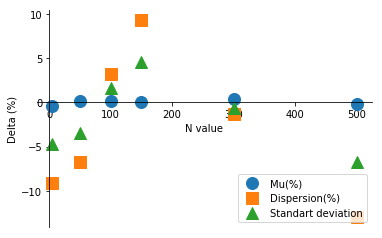

In [67]:
# нарисуем у графика оси
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# построим сами графики
plt.plot(frame.loc[i,['Объем выборки']], frame.loc[i,['Мат. ожидание (откл-е, %)']],'o', markersize=12, label='Mu(%)')
plt.plot(frame.loc[i,['Объем выборки']], frame.loc[i,['Дисперсия (откл-е, %)']], 's',markersize=12, label='Dispersion(%)')
plt.plot(frame.loc[i,['Объем выборки']], frame.loc[i,['Стандарт. откл-е (откл-е, %)']], '^',markersize=12, label='Standart deviation')

# подпишем оси
plt.xlabel('N value')
plt.ylabel('Delta (%)')
plt.legend(loc=4)
plt.show()

# Вместо выводов

Однако, в соответствии с графиком, не так радужно все оказалось, как нам (конечно же мне) думалось до начала проведения исследования.

Начнем по порядку. 

Во-первых, выборочное среднее действительно, с увеличением выборки приближается к математическому ожиданию нормального распределения (т.е. к 80-ти), но при объеме выборки более $n > 100$ эффект от объема не шибко впечатляет: выборочное среднее далеко не всегда приближается к теоретическому значению равному 80. 

Во-вторых, что касается параметров дисперсии и стандартного отклонения, так здесь вообще не видно никакой аппроксимации, то есть, вероятно мы (опять конечно же я) ошибочно полагали, что при увеличении выборки, отклонение выборочных параметров будет уменьшаться от расчетных теоретических. С другой стороны, на то оно и исследование, чтобы подтверждать или опровергать предположения.

Но не спешим расстраиваться! Несмотря на то, что отклонения расчетных параметров от выборочных не уменьшаются в относительных величинах, они существенно снижаются в абсолютных и более того, и $это$ $очень$ $важно$, мы наблюдаем $уменьшение$ $стандартного$ $отклонения$ в целом, что говорит о большей концентрации величин вокруг значения выборочного среднего, а следовательно, действительно при увеличении объема выборок распределение становится все ближе и ближе к нормальному. То есть тот посыл, который несет нам Центральная предельная теорема мы увидели во всей красе и что еще более важно пощупали ручками. Вроде все работает))